### AcO_rM1Pos_FEM

In [1]:
import dos
from IPython.display import Image
path = './dos/AcO_rM1Pos_FEM'

INFO:DOS:Reading config from ./dos/AcO_rM1Pos_FEM/dos.yaml
INFO:DOS:New driver: M1
INFO:M1:New input: Txyz
INFO:M1:New input: Rxyz
INFO:M1:New input: modes
INFO:M1:No inputs!
INFO:DOS:New driver: M2
INFO:M2:New input: Txyz
INFO:M2:New input: Rxyz
INFO:M2:No inputs!
INFO:DOS:New driver: wfs48
INFO:wfs48:No inputs!
INFO:wfs48:New output: M12_RBM
INFO:wfs48:Output logged in!
INFO:DOS:New driver: AcO_controller
INFO:AcO_controller:New input: x_hat
INFO:AcO_controller:New output: M1 Txyz
INFO:AcO_controller:Output logged in!
INFO:AcO_controller:New output: M1 Rxyz
INFO:AcO_controller:Output logged in!
INFO:AcO_controller:New output: M2 Txyz
INFO:AcO_controller:Output logged in!
INFO:AcO_controller:New output: M2 Rxyz
INFO:AcO_controller:Output logged in!
INFO:AcO_controller:New output: M1 BM
INFO:AcO_controller:Output logged in!
INFO:DOS:New driver: rM1Pos0
INFO:rM1Pos0:New input: Txyz
INFO:rM1Pos0:New input: Rxyz
INFO:rM1Pos0:New output: rM1Pos_out
INFO:rM1Pos0:Output logged in!
INFO:DOS:N

SIMCEO server received: Acknowledging connection from SIMCEO client!


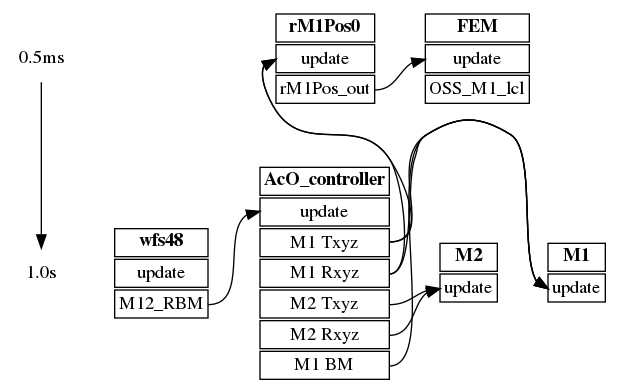

In [2]:
# init
sim = dos.DOS(path, 20, show_timing = 2)
Image(filename=path + '/timing.png') 

In [3]:
sim.start()

INFO:DOS:Pushing configuration to server
INFO:M1:GMT
INFO:M2:GMT
INFO:wfs48:OP0
INFO:FEM:FEM
INFO:DOS:Initializing
INFO:M1:None
INFO:M2:None
INFO:wfs48:None
INFO:FEM:None
INFO:DOS:Running
INFO:DOS:Terminating
INFO:M1:GMT deleted!
INFO:M2:GMT deleted!
INFO:wfs48:OpticalPath deleted!
INFO:FEM:FEM deleted


Elapsed time: 40.26695466041565


In [4]:
sim.terminate()

INFO:DOS:Terminating


In [6]:
SAVE = True

#### Backup simulated Data

In [7]:
import pickle

if SAVE:
    with open('./logs/trivial_AcO_rM1Pos_FEM.sclogs', 'wb') as f:
        pickle.dump(sim.logs.entries, f)
        logs = sim.logs.entries
        
else:
    logs = pickle.load( open( './logs/trivial_AcO_rM1Pos_FEM.sclogs', "rb" ) )
        

# plot logs
---

In [8]:
import matplotlib.pyplot as plt
try:
    from jupyterthemes import jtplot
    jtplot.style()
except:
    pass

import numpy as np

logs

{'wfs48': {'M12_RBM': <dos.dos.Entry at 0x7fc7c67a7bd0>},
 'AcO_controller': {'M1 Txyz': <dos.dos.Entry at 0x7fc7c6731510>,
  'M1 Rxyz': <dos.dos.Entry at 0x7fc7f4db1e50>,
  'M2 Txyz': <dos.dos.Entry at 0x7fc7c678ac90>,
  'M2 Rxyz': <dos.dos.Entry at 0x7fc7c67a7e90>,
  'M1 BM': <dos.dos.Entry at 0x7fc7c6731490>},
 'rM1Pos0': {'rM1Pos_out': <dos.dos.Entry at 0x7fc7c6731d10>},
 'FEM': {'OSS_M1_lcl': <dos.dos.Entry at 0x7fc7c6731e50>}}

#### BM

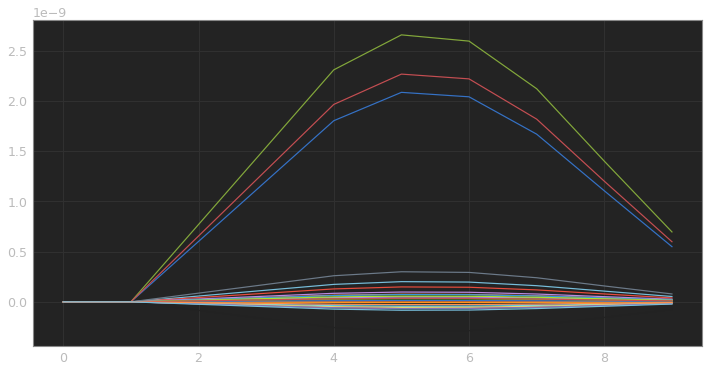

In [9]:
%matplotlib inline

BM = logs['AcO_controller']['M1 BM'].timeSeries[1]
time = logs['rM1Pos0']['rM1Pos_out'].timeSeries[0]
plt.figure(figsize=(12,6))
plt.xticks(np.arange(0, 20, 2))
for k in range(BM[0,:,:].shape[0]):
    plt.plot(time[::20], BM[0,k,:])
plt.show()

#### x_hat

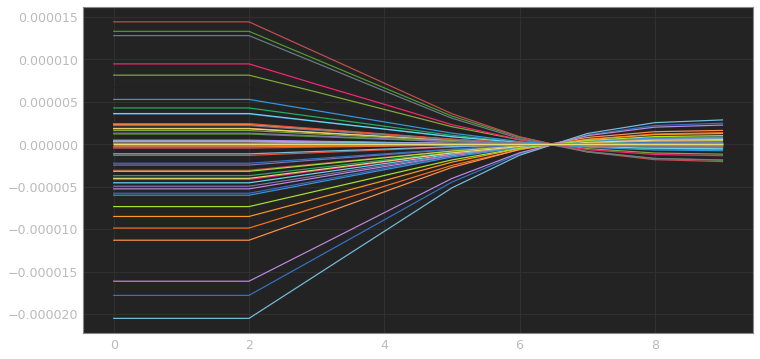

In [10]:
wfs = logs['wfs48']['M12_RBM'].timeSeries[1]

plt.figure(figsize=(12,6))
plt.plot(wfs)
plt.show()

#### Hardpoints

In [11]:
Txyz = logs['AcO_controller']['M1 Txyz'].timeSeries[1]
Rxyz = logs['AcO_controller']['M1 Rxyz'].timeSeries[1]
TRxyz = np.concatenate((Txyz, Rxyz), axis = 1)

M1Pos_out = logs['rM1Pos0']['rM1Pos_out'].timeSeries[1]
M1Pos_out_r = np.stack(np.split(M1Pos_out, 7, axis = 1), axis = 2)

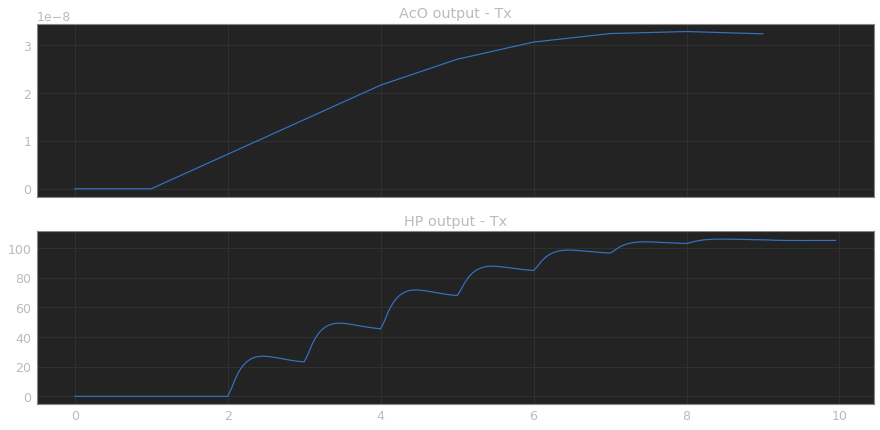

In [12]:
# Select
seg =  1    #1 - 7
rbm = 'Tx'  # Tx Ty Tz Rx Ry Rz

# Plot ------
table = ['Tx','Ty','Tz','Rx','Ry','Rz']
rbm_index = table.index(rbm)
#plt.figure(figsize=(15,7))
fig1, (ax1,ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,7))
ax1.set_xticks(np.arange(0,20,2))
ax1.set_title('AcO output - ' + rbm)
ax1.plot(time[::20], TRxyz[seg - 1, rbm_index,:])

ax2.set_title('HP output - ' + rbm)
ax2.plot(time,M1Pos_out_r[:, rbm_index, seg - 1])
plt.show()

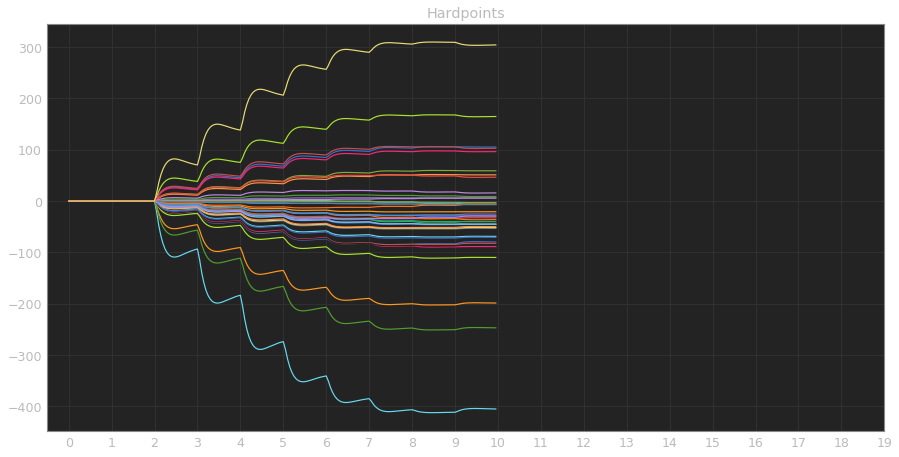

In [13]:
plt.figure(figsize = (15,7.5))
plt.plot(time, M1Pos_out)
plt.xticks(np.arange(0,20,1))
plt.title('Hardpoints')
plt.show()

/home/felipe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


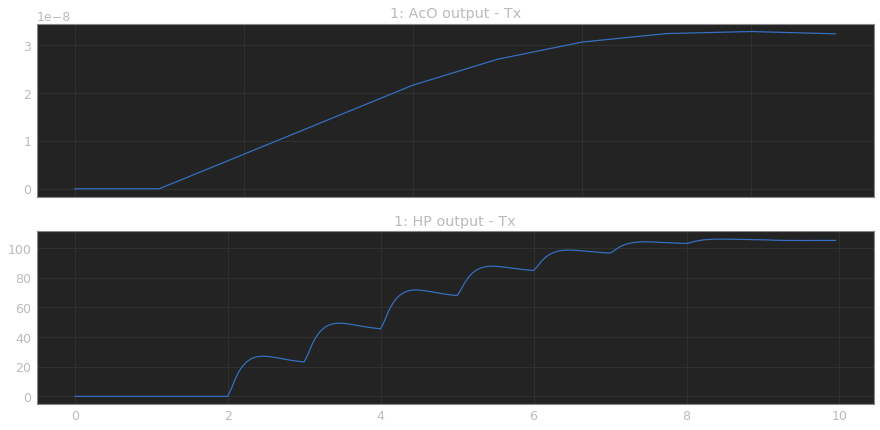

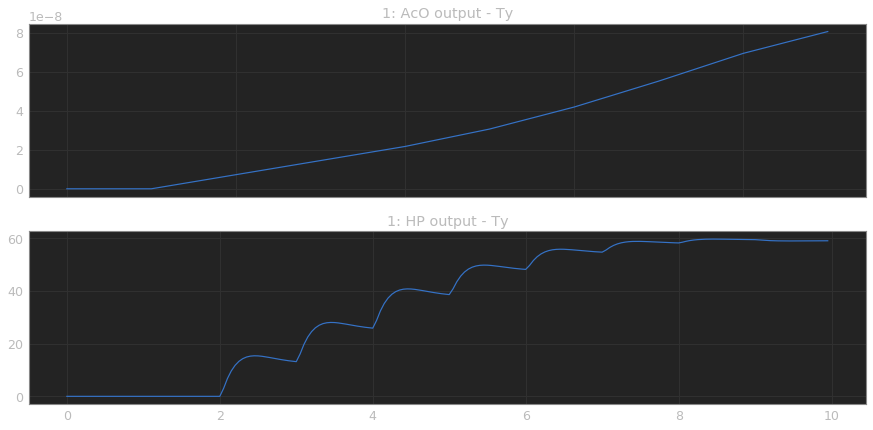

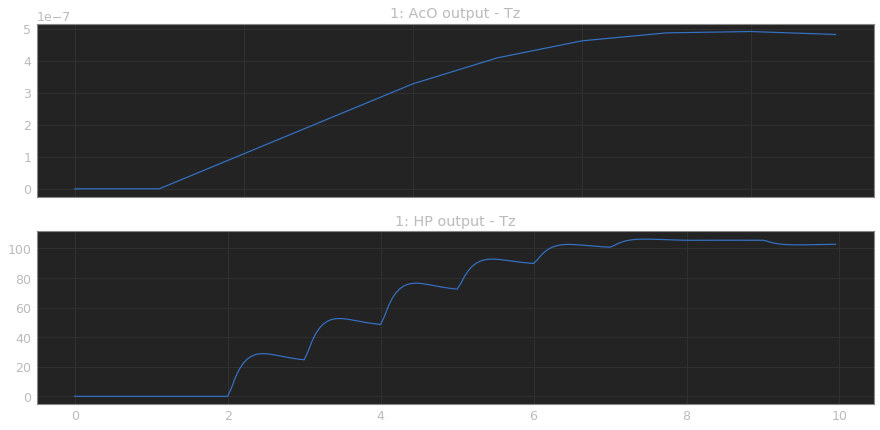

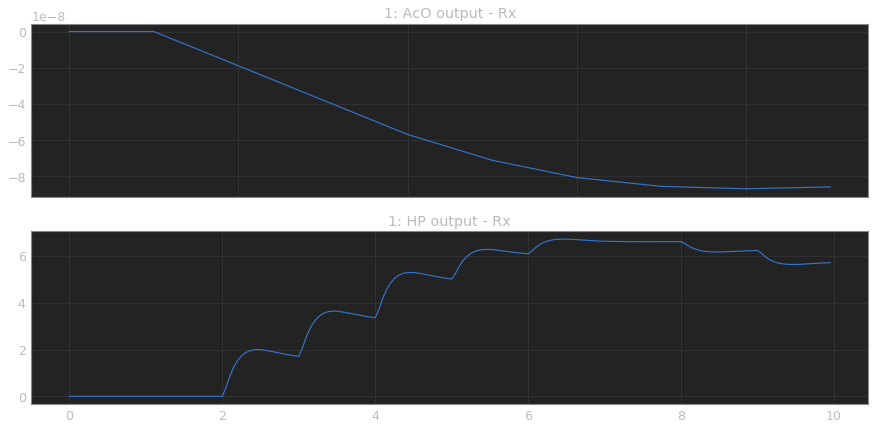

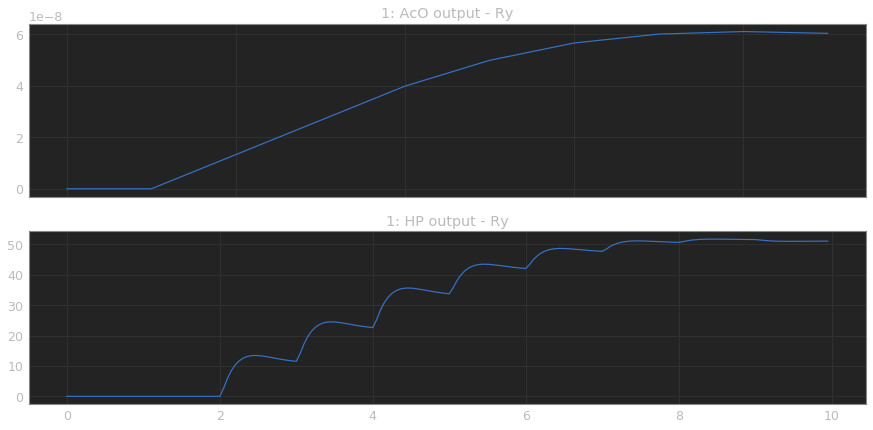

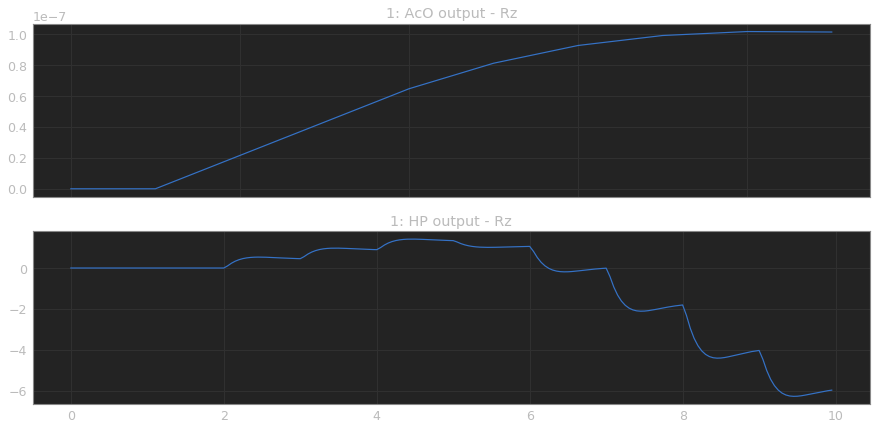

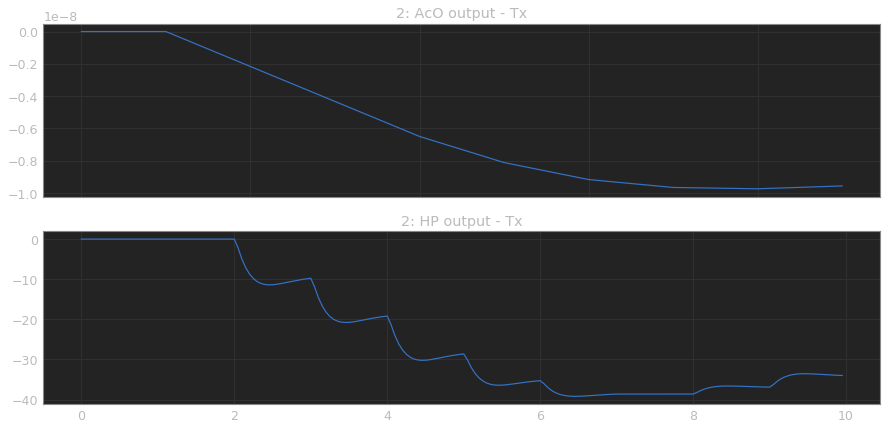

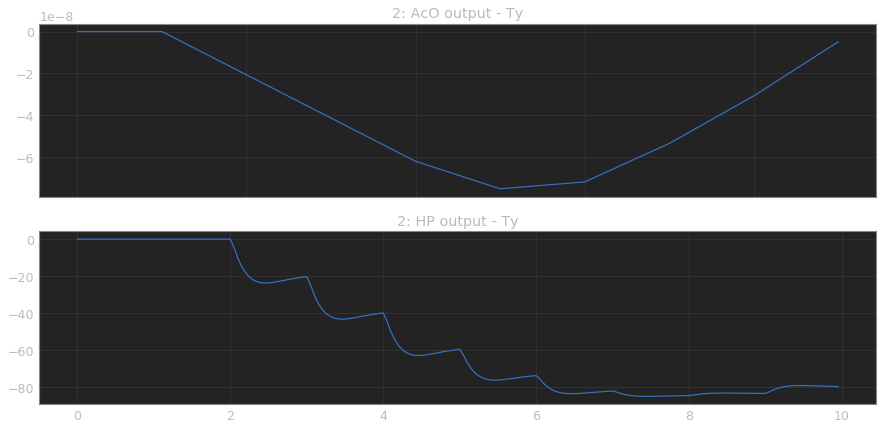

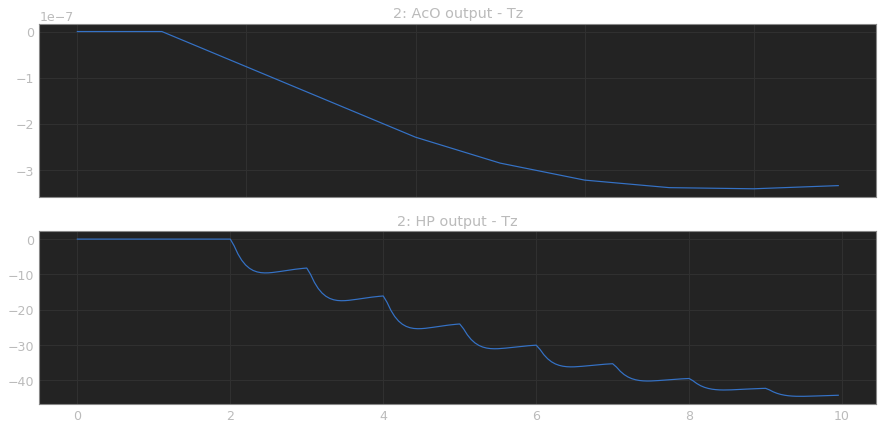

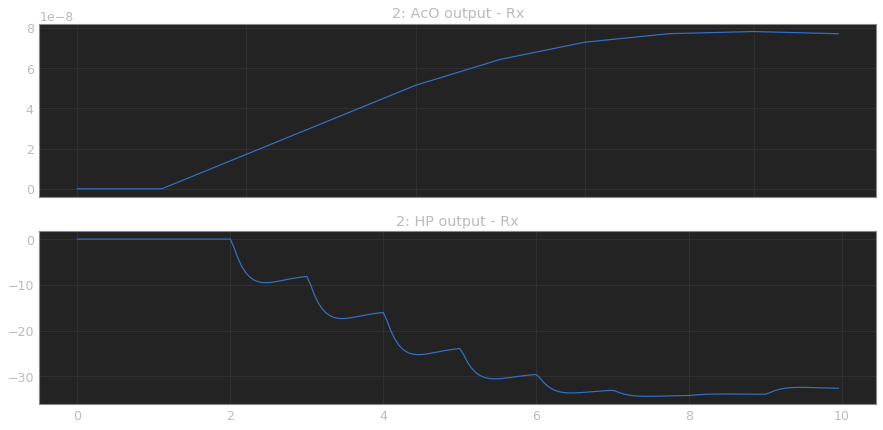

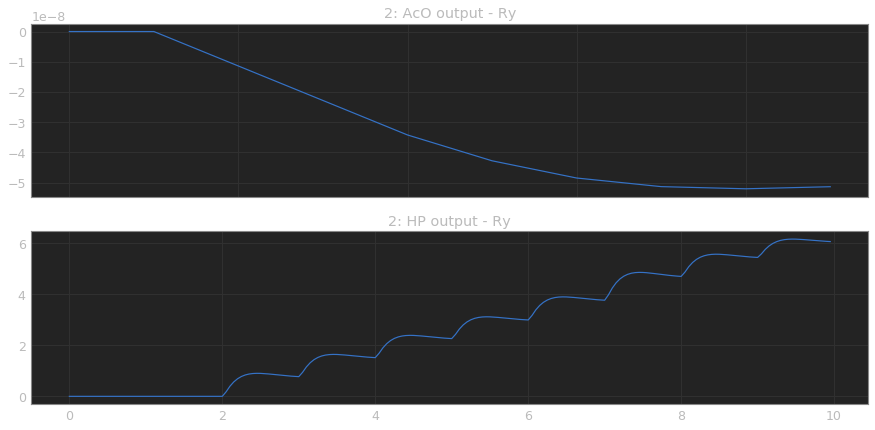

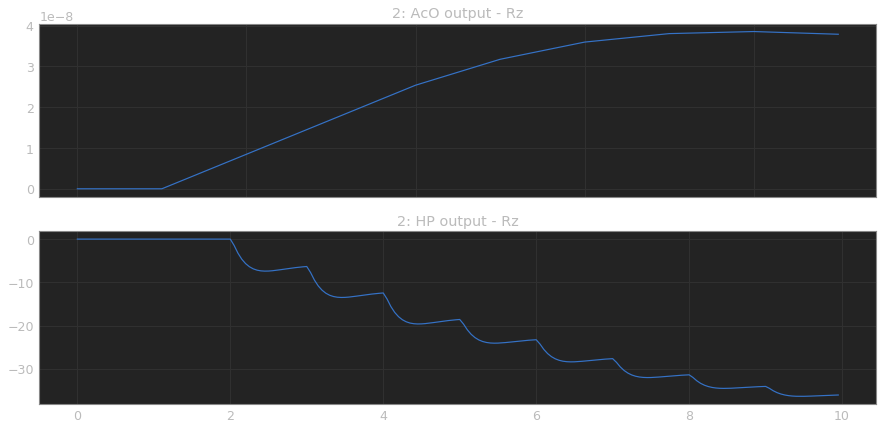

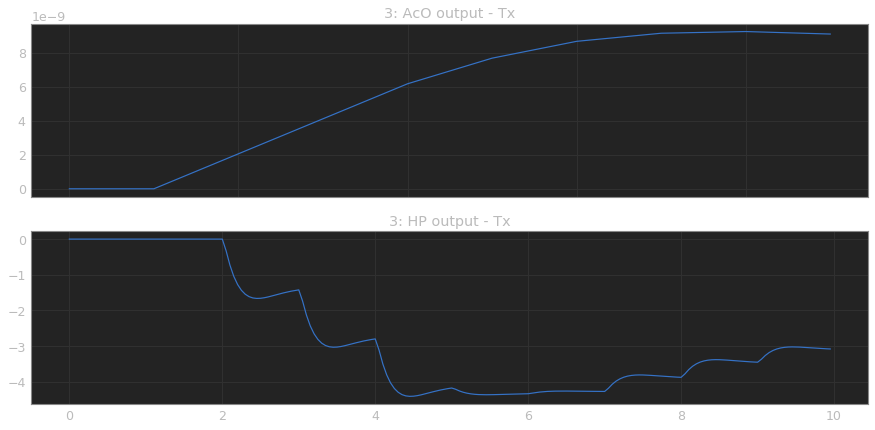

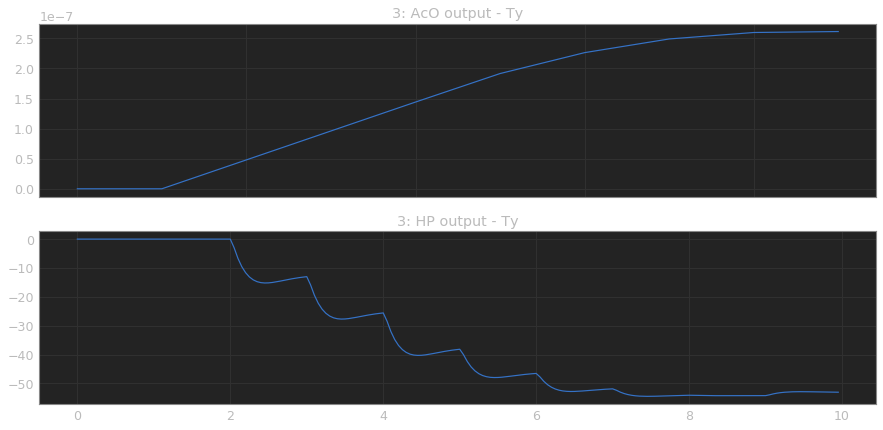

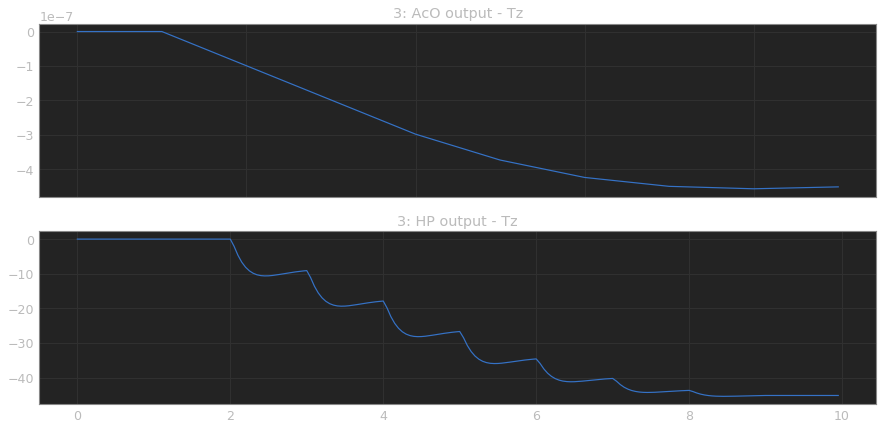

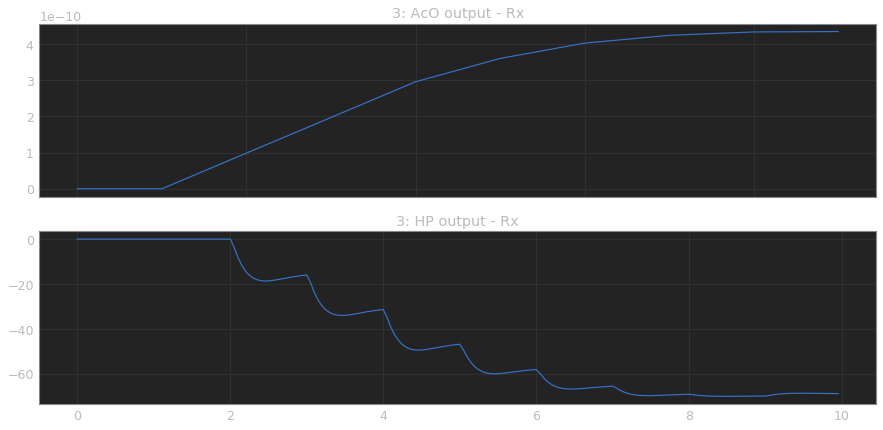

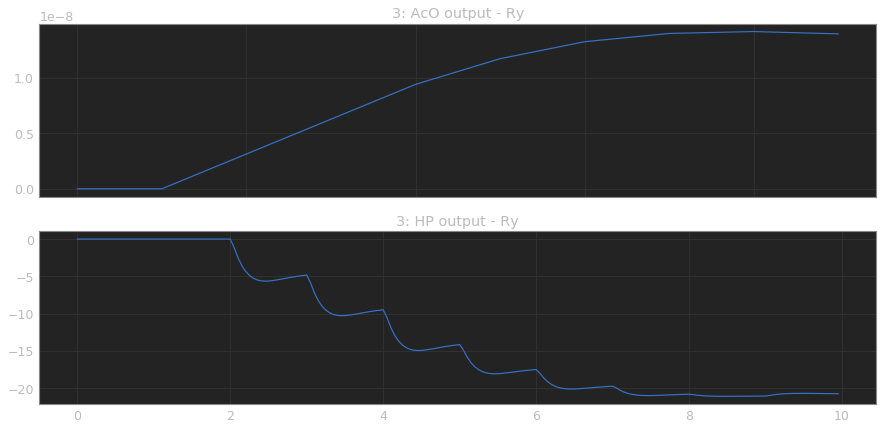

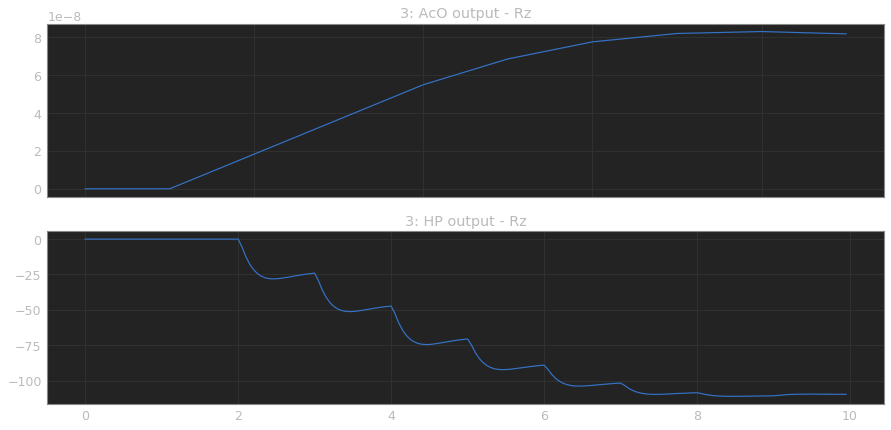

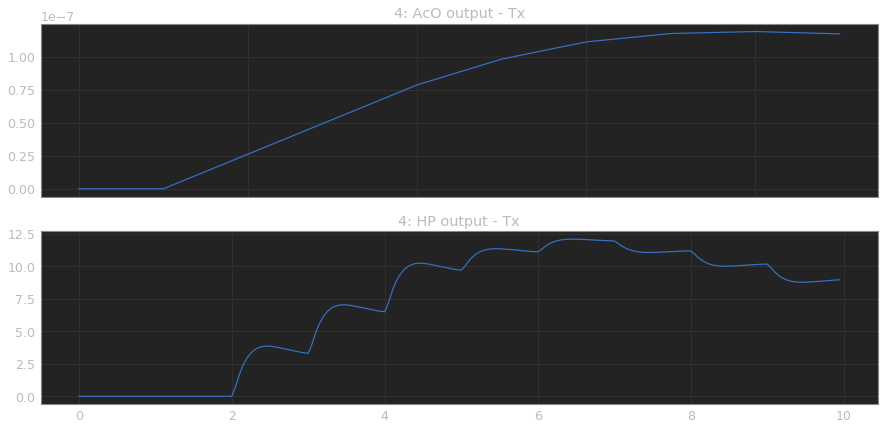

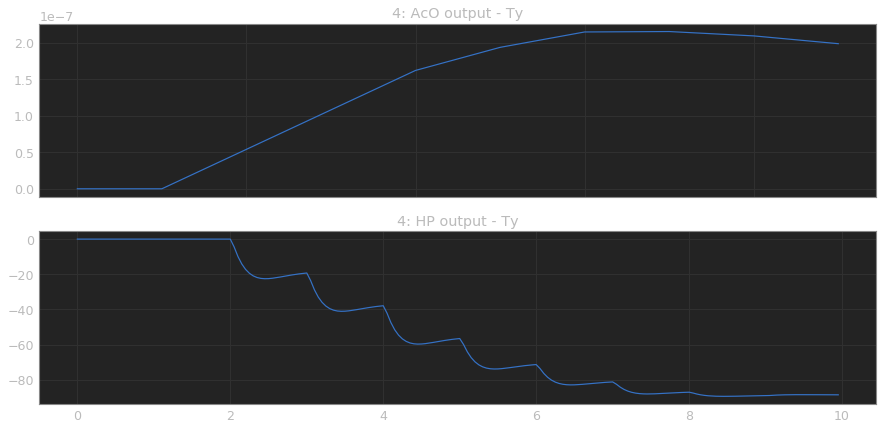

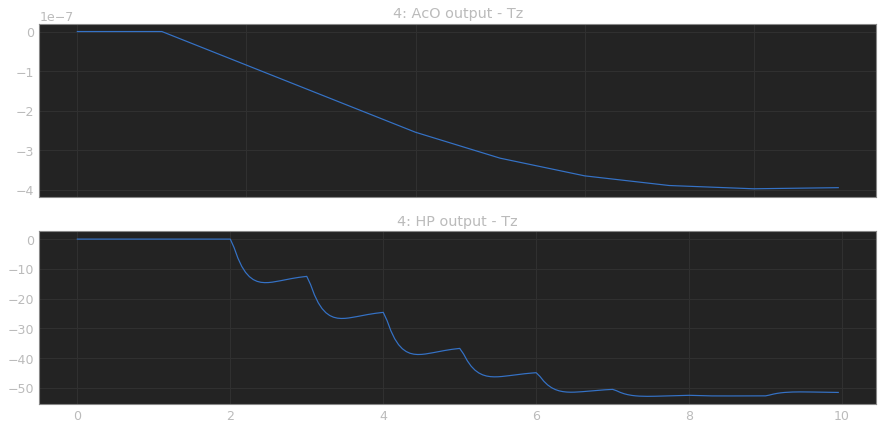

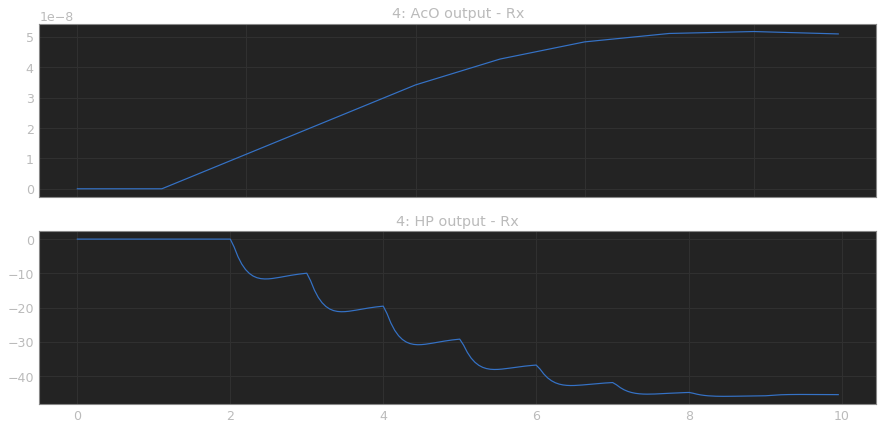

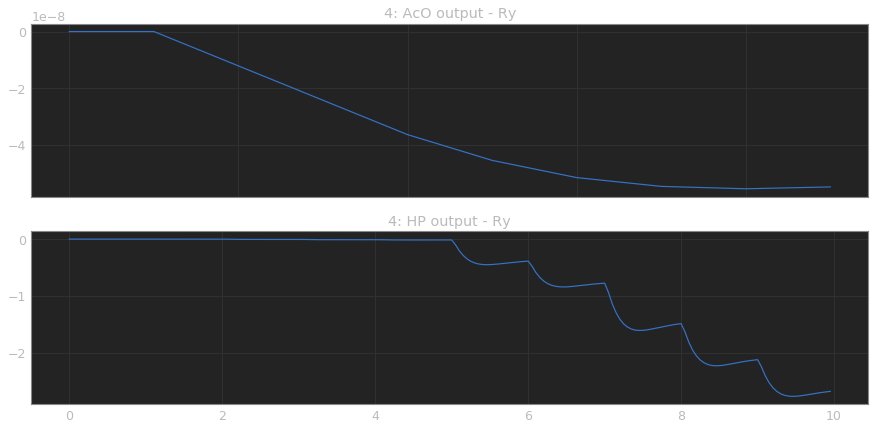

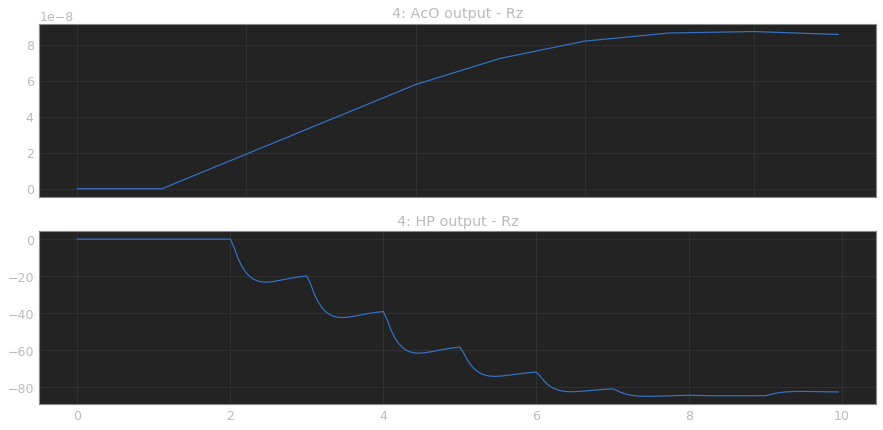

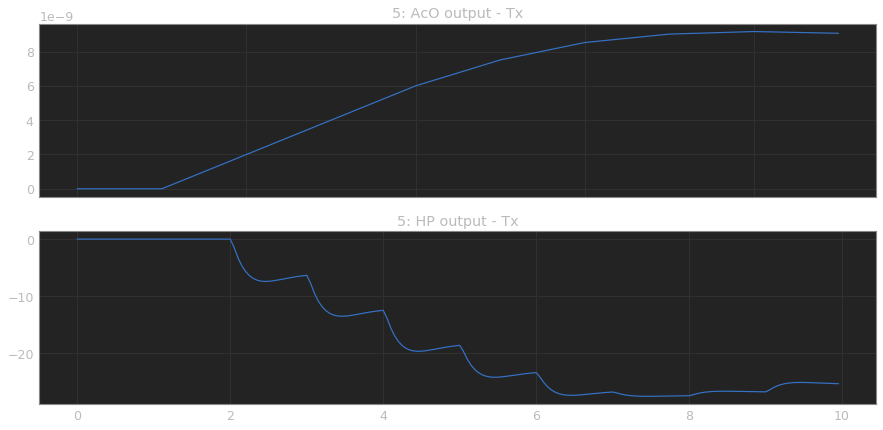

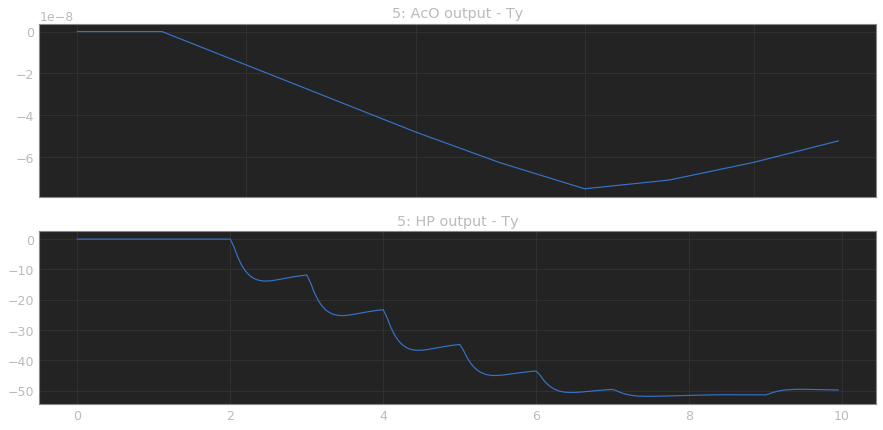

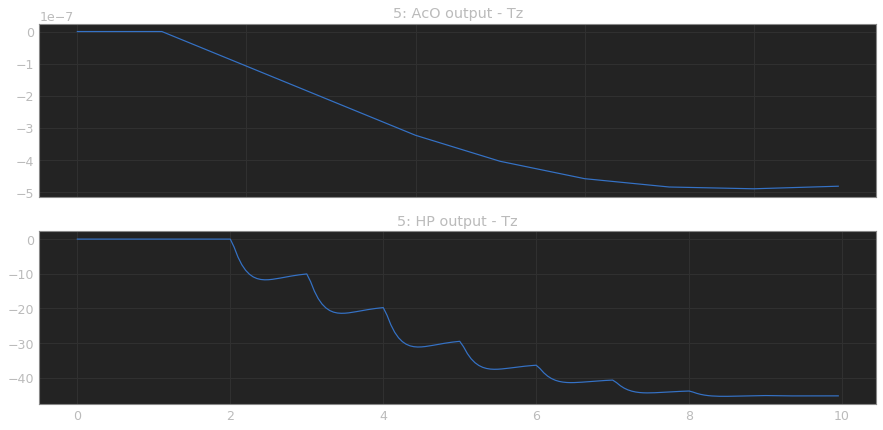

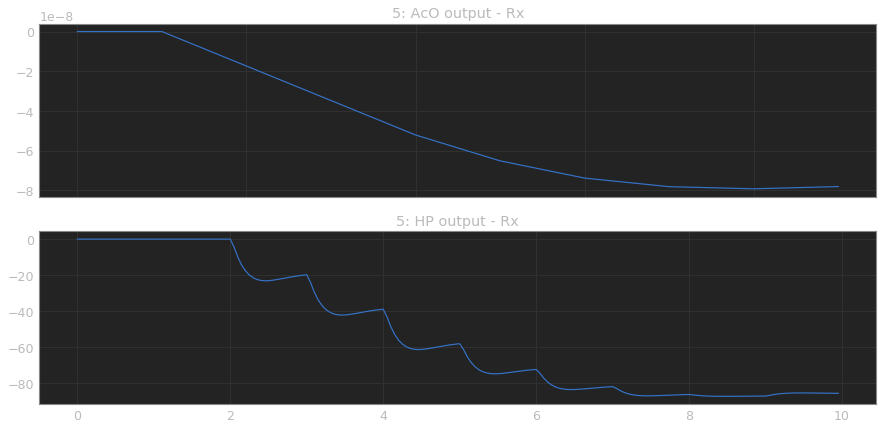

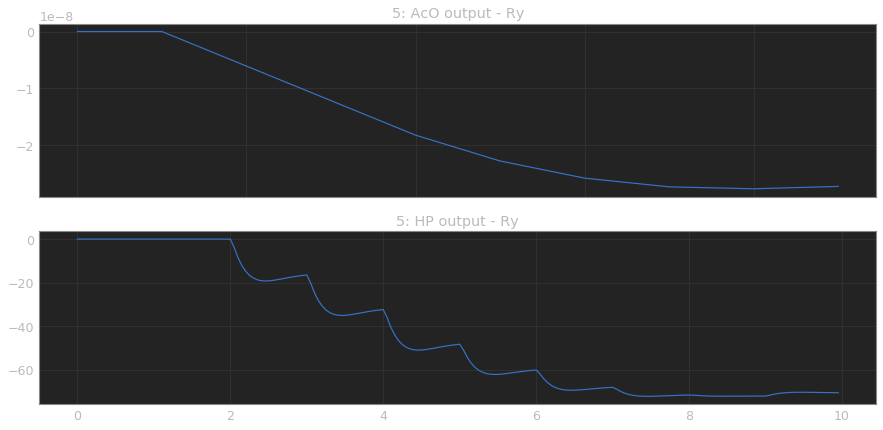

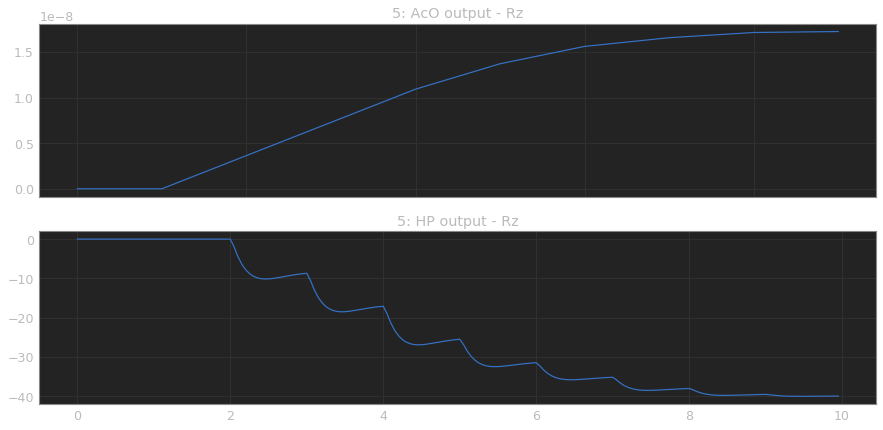

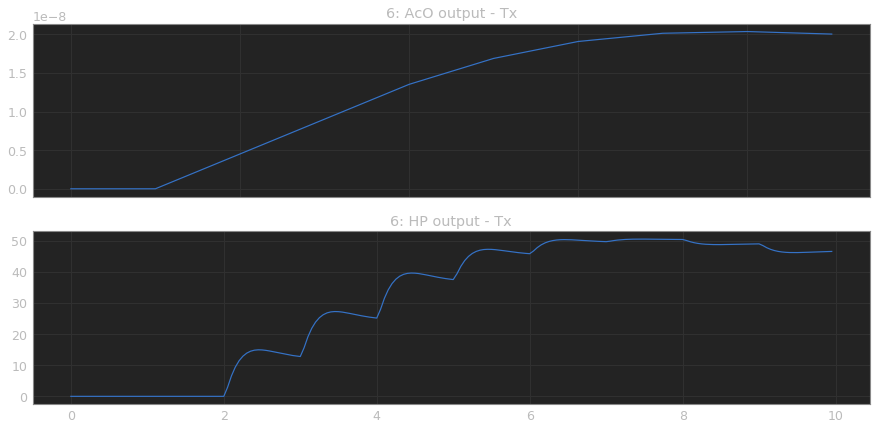

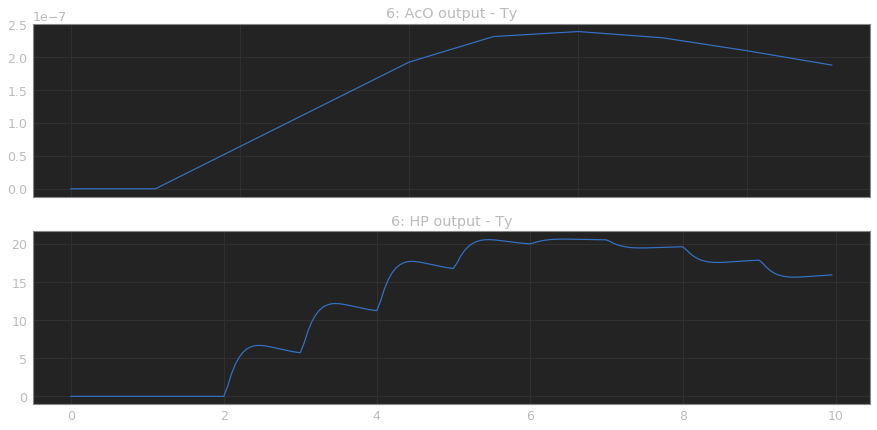

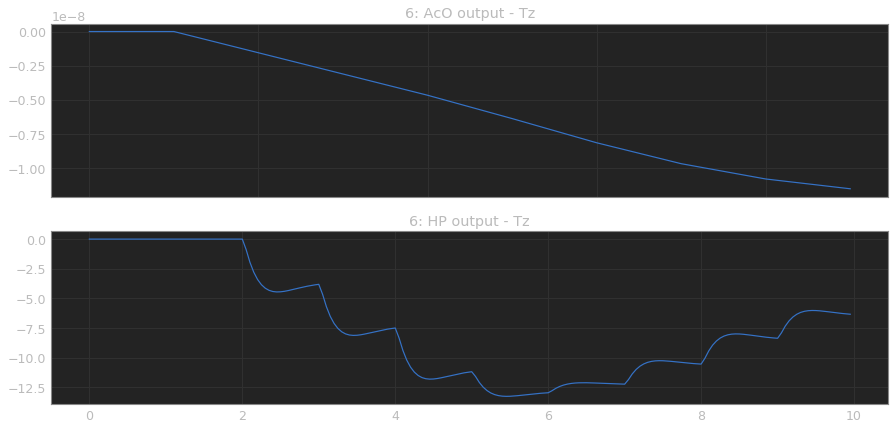

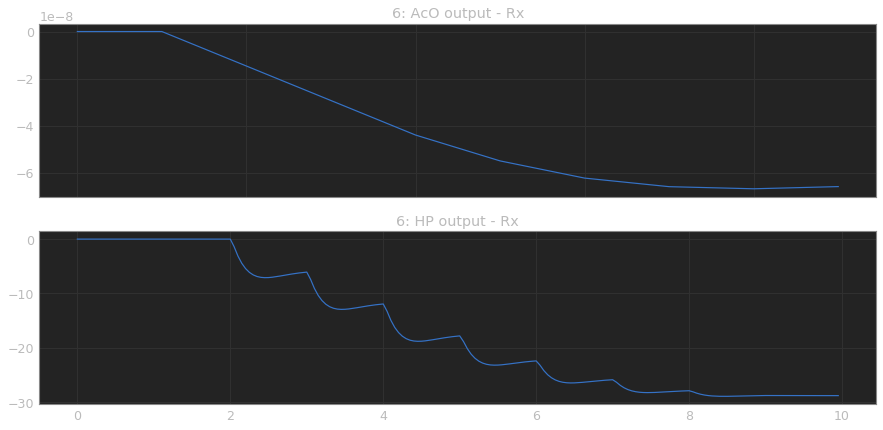

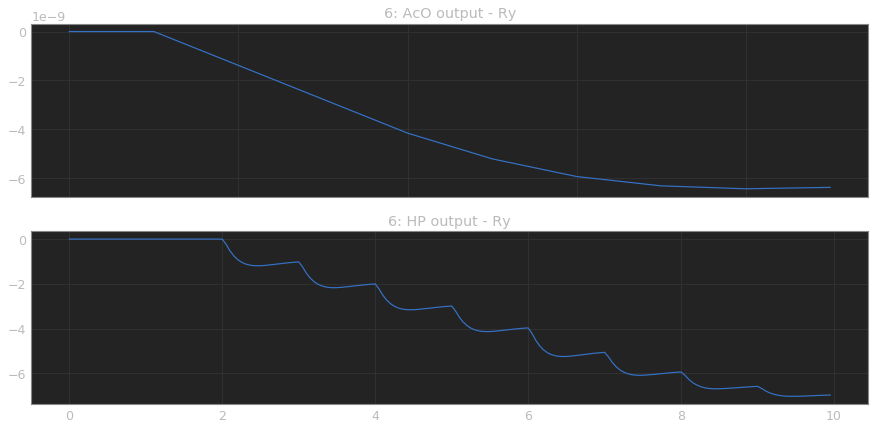

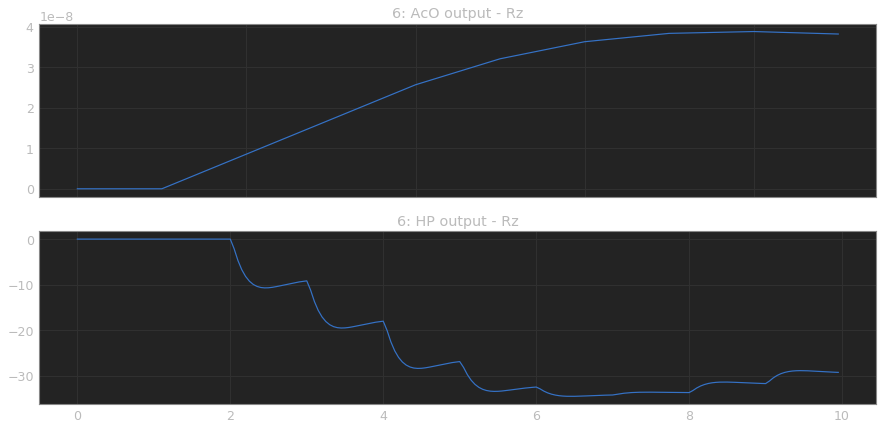

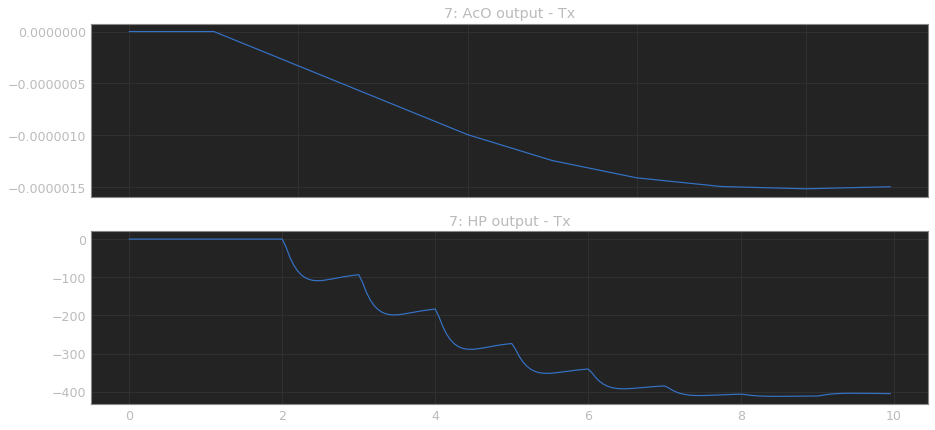

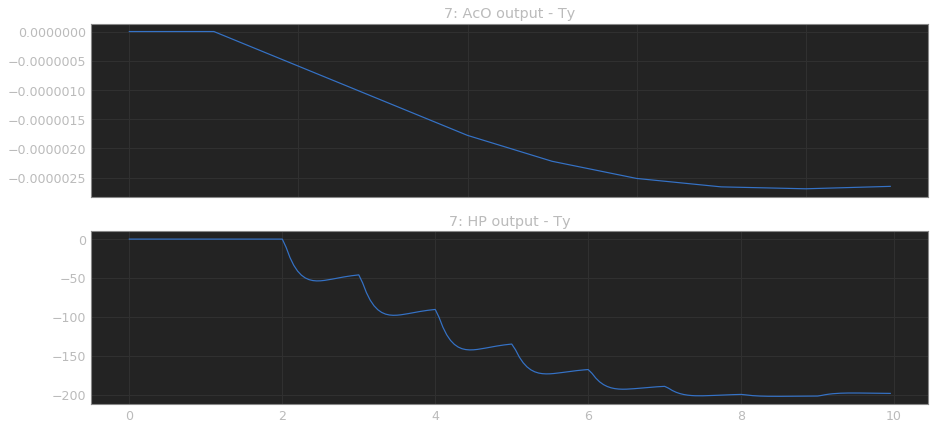

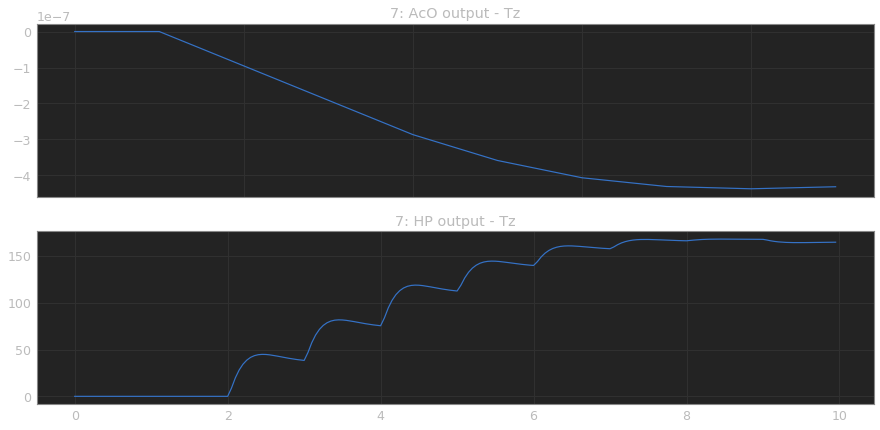

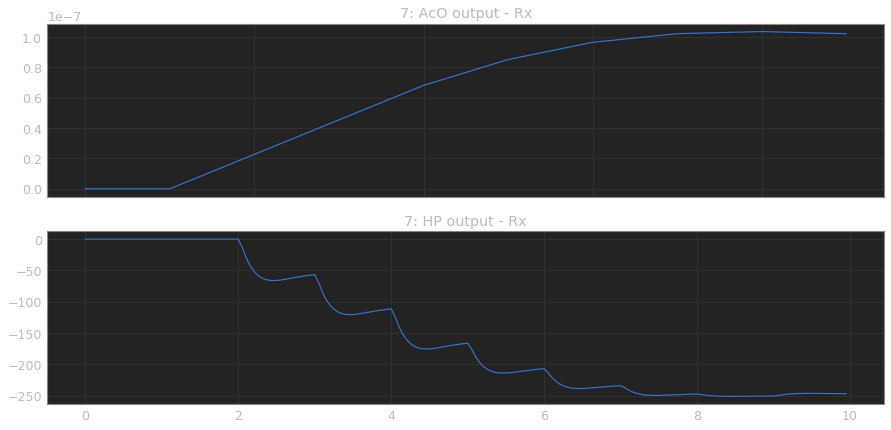

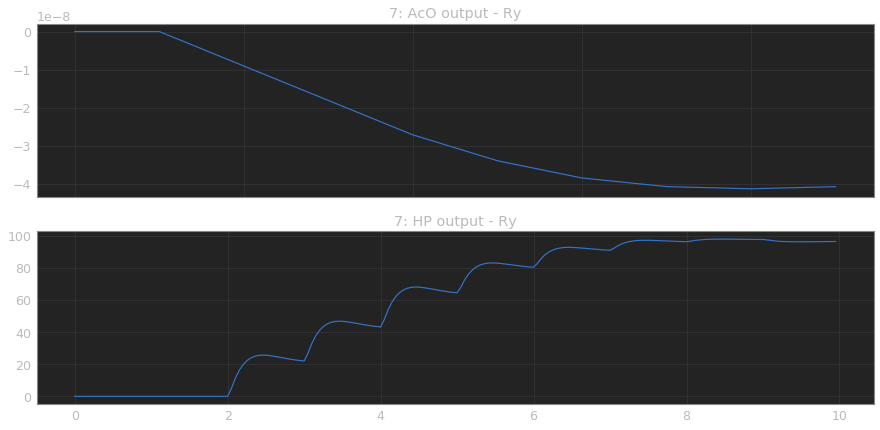

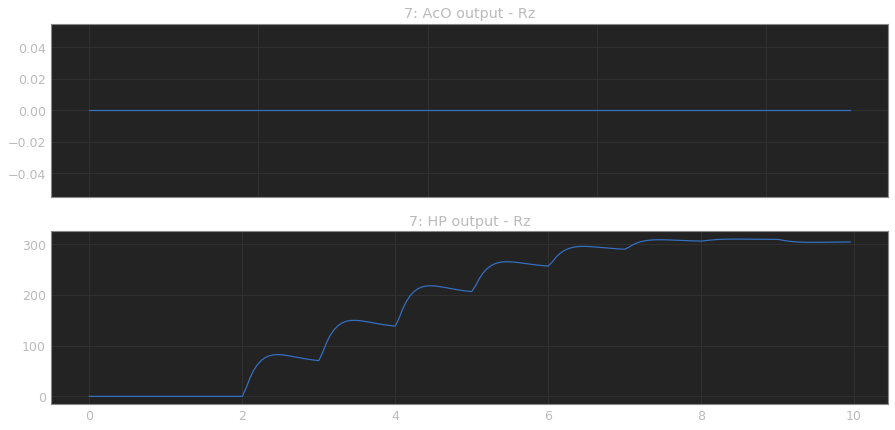

In [14]:
# Plot all AcO outputs and Hardpoints

table = ['Tx','Ty','Tz','Rx','Ry','Rz']
rbm_index = table.index(rbm)

for seg in range(7):
    for rbm in table:
        rbm_index = table.index(rbm)
        
        fig1, (ax1,ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,7))
        ax1.set_title(str(seg + 1) + ': AcO output - ' + rbm)
        ax1.plot(time[::20], TRxyz[seg, rbm_index,:])
        ax2 = plt.subplot(2,1,2)
        ax2.set_title(str(seg + 1) + ': HP output - ' + rbm)
        ax2.plot(time, M1Pos_out_r[:, rbm_index, seg])

plt.show()

##### FEM
---

In [15]:
FEM_time = logs['FEM']['OSS_M1_lcl'].timeSeries[0]
FEM_TRxyz = logs['FEM']['OSS_M1_lcl'].timeSeries[1]
FEM_TRxyz = np.stack(np.split(FEM_TRxyz, 6 , axis = 1), axis = 2)
FEM_TRxyz.shape

(200, 7, 6)

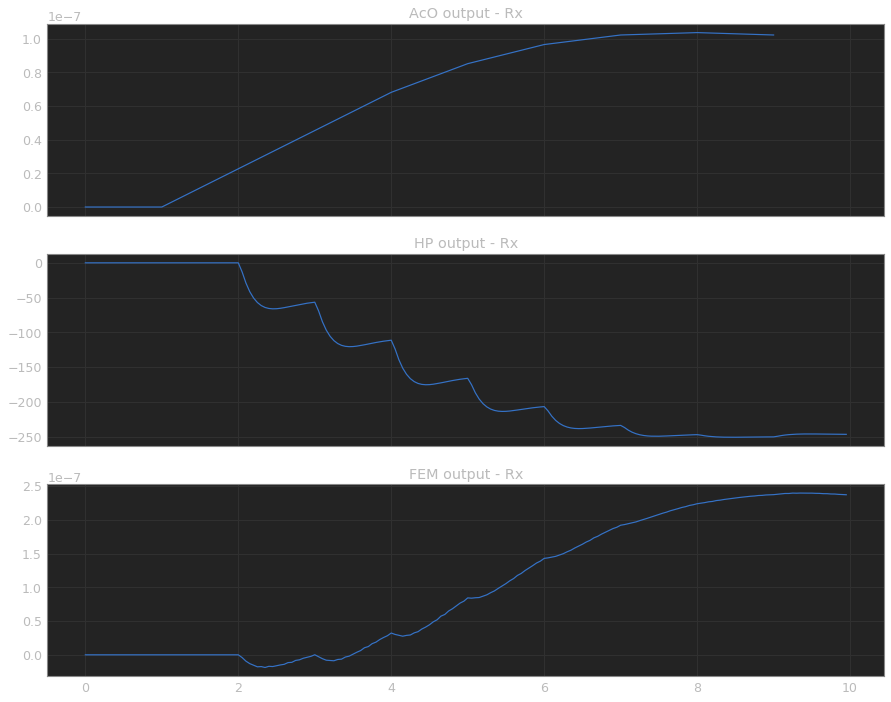

In [16]:
# Select
seg =  7    #1 - 7
rbm = 'Rx'  # Tx Ty Tz Rx Ry Rz

# Plot ------
table = ['Tx','Ty','Tz','Rx','Ry','Rz']
rbm_index = table.index(rbm)
#plt.figure(figsize=(15,7))
fig1, (ax1,ax2,ax3) = plt.subplots(3, 1, sharex=True, figsize=(15,12))
ax1.set_xticks(np.arange(0,20,2))
ax1.set_title('AcO output - ' + rbm)
ax1.plot(time[::20], TRxyz[seg - 1, rbm_index,:])

ax2.set_title('HP output - ' + rbm)
ax2.plot(time,M1Pos_out_r[:, rbm_index, seg - 1])

ax3.set_title('FEM output - ' + rbm)
ax3.plot(FEM_time, FEM_TRxyz[:,seg -1, rbm_index])
plt.show()